## Linear Regression

In [19]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]

In [2]:
carseat_df = pd.read_csv("https://raw.githubusercontent.com/LukeMoraglia/ISLR_datasets/master/data/Carseats.csv")

In [3]:
carseat_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [12]:
y = carseat_df["Sales"]
X = carseat_df[["Price", "Urban", "US"]]
X.head()

,Price,Urban,US
0,120,Yes,Yes
1,83,Yes,Yes
2,80,Yes,Yes
3,97,Yes,Yes
4,128,Yes,No


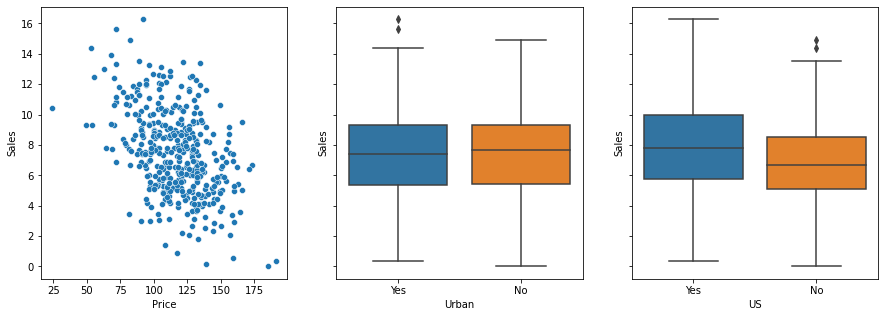

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.scatterplot(ax=axes[0], x="Price", y="Sales", data=carseat_df)
sns.boxplot(ax = axes[1], x="Urban", y="Sales", data=carseat_df)
sns.boxplot(ax = axes[2], x="US", y="Sales", data=carseat_df)
plt.show()

In [14]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,Price,Urban_Yes,US_Yes
0,120,1,1
1,83,1,1
2,80,1,1
3,97,1,1
4,128,1,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
 )

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

In [24]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"Train MSE = {round(mse_train, 3)}")
print(f"Test MSE = {round(mse_test, 3)}")

Train MSE = 5.636
Test MSE = 7.775


In [25]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print(f"Train R^2 = {round(r2_train, 3)}")
print(f"Test R^2 = {round(r2_test, 3)}")

Train R^2 = 0.24
Test R^2 = 0.214
